In [89]:
import numpy as np
from matplotlib import pyplot as plt

In [90]:
def get_boxes(image, size):
    assert image.shape[0] % size == 0
    assert image.shape[1] % size == 0
    assert image.shape[0] == image.shape[1]
    sq1 = image.shape[0]*image.shape[1]
    sq2 = size*size
    count = int(sq1/sq2)
    boxes = np.zeros((count, size, size))
    boxes_info = np.zeros((count, 2))
    filled = 0
    for i in range(0, image.shape[0], size):
        for j in range(0, image.shape[1], size):
            boxes[filled] = image[i: i+size, j: j+size]
            boxes_info[filled] = np.array([int(i),int(j)])
            filled = filled + 1
    return boxes, boxes_info
size = 16
sq = 4
before = np.array(list(range(size))).reshape(sq, sq)
print(before)
get_boxes(before, size=2) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


(array([[[ 0.,  1.],
         [ 4.,  5.]],
 
        [[ 2.,  3.],
         [ 6.,  7.]],
 
        [[ 8.,  9.],
         [12., 13.]],
 
        [[10., 11.],
         [14., 15.]]]), array([[0., 0.],
        [0., 2.],
        [2., 0.],
        [2., 2.]]))

In [91]:
def fill_from_boxes(image, boxes, boxes_info):
    size = boxes.shape[1]
    for i in range(len(boxes)):
        image[int(boxes_info[i][0]):int(boxes_info[i][0])+size, int(boxes_info[i][1]):int(boxes_info[i][1])+size] = boxes[i]
    return image

In [92]:
fill_from_boxes(before, get_boxes(before, size=2)[0], get_boxes(before, size=2)[1])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

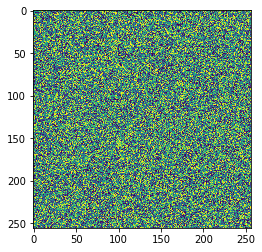

In [136]:
def default_paint_f(paints, sector_code, image):
    return paints + 20*sector_code + image

def recur_squarred_paint(paints_storage, image, paint_f=default_paint_f, sector_code=1, deep=0):
    paints = paints_storage[deep]
    paints_size = paints.shape[0]
    if paints.shape == image.shape:
        return paint_f(paints, sector_code, image)
    else:
        parts, parts_info = get_boxes(image, int(image.shape[0]/paints_size))
        part_size = parts.shape[1]
    
        for i in range(paints.flatten().shape[0]):
            part_paint = np.repeat(paints.flatten()[i], part_size*part_size).reshape(part_size, part_size)
            parts[i] = recur_squarred_paint(paints_storage, parts[i], sector_code = i)
            # get down more
            parts[i] = recur_squarred_paint(paints_storage, parts[i], sector_code = i, deep=deep+1)
        return fill_from_boxes(image, parts, parts_info)

before = np.random.randint(-10, 10, (256, 256))
plt.imshow(before)


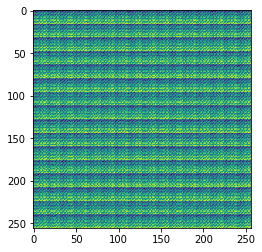

In [135]:
noise = np.random.randint(-40, 4, (256, 256))
kernels = np.random.randint(-20, 20, (5, 4, 4))
result = recur_squarred_paint(kernels, noise)
plt.imshow(result)